In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('loan.csv')

In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df.select_dtypes(exclude = ['int', 'float']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
df.select_dtypes(include = ['int', 'float']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [ ]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [ ]:
df.shape

(1460, 4)

In [ ]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [ ]:
# Percentage of missing values
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

### Compute the frequency with every feature

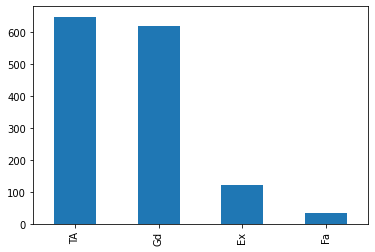

In [ ]:
df['BsmtQual'].value_counts().plot.bar()

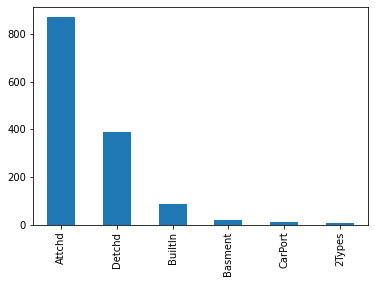

In [ ]:
df['GarageType'].value_counts().plot.bar()

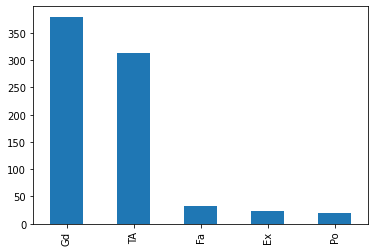

In [ ]:
df['FireplaceQu'].value_counts().plot.bar()

FREQUENT CATEGORY IMPUTATION

In [ ]:
df['GarageType'].value_counts().index[:]

Index(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'CarPort', '2Types'], dtype='object')

In [ ]:
df['GarageType'].mode()[0]

'Attchd'

In [ ]:
def impute_nan(df,variable):
    most_frequent_category = df[variable].mode()[0]
    # df[variable].fillna(most_frequent_category,inplace=True)
    df[variable+'_mode'] = df[variable].fillna(most_frequent_category)

In [ ]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [ ]:
# Percentage of null values
df.isnull().sum()

BsmtQual            0
FireplaceQu         0
GarageType          0
SalePrice           0
BsmtQual_mode       0
FireplaceQu_mode    0
GarageType_mode     0
dtype: int64

CAPTURING NULL VALUES WITH A NEW FEATURE WITH FREQUENT CATEGORY IMPUTATION

In [ ]:
def impute_newvar(df,variable):
  df[variable+"_Var"] = np.where(df[variable].isnull(),1,0)

for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_newvar(df,feature)

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_mode,FireplaceQu_mode,GarageType_mode,BsmtQual_Var,FireplaceQu_Var,GarageType_Var
0,Gd,Gd,Attchd,208500,Gd,Gd,Attchd,0,0,0
1,Gd,TA,Attchd,181500,Gd,TA,Attchd,0,0,0
2,Gd,TA,Attchd,223500,Gd,TA,Attchd,0,0,0
3,TA,Gd,Detchd,140000,TA,Gd,Detchd,0,0,0
4,Gd,TA,Attchd,250000,Gd,TA,Attchd,0,0,0


In [ ]:
df['BsmtQual'].mode()[0]

'TA'

In [ ]:
def impute_nan(df,variable):
    most_frequent_category = df[variable].mode()[0]
    # df[variable].fillna(most_frequent_category,inplace=True)
    df[variable+'_mode'] = df[variable].fillna(most_frequent_category)

In [ ]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_mode,FireplaceQu_mode,GarageType_mode,BsmtQual_Var,FireplaceQu_Var,GarageType_Var
0,Gd,Gd,Attchd,208500,Gd,Gd,Attchd,0,0,0
1,Gd,TA,Attchd,181500,Gd,TA,Attchd,0,0,0
2,Gd,TA,Attchd,223500,Gd,TA,Attchd,0,0,0
3,TA,Gd,Detchd,140000,TA,Gd,Detchd,0,0,0
4,Gd,TA,Attchd,250000,Gd,TA,Attchd,0,0,0


FOR MORE FREQUENT CATEGORIES, REPLACE NAN WITH A NEW CATEGORY

In [ ]:
df=pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [ ]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [ ]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [ ]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [ ]:
# df = df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [ ]:
df.BsmtQualnewvar.value_counts()

TA         649
Gd         618
Ex         121
Missing     37
Fa          35
Name: BsmtQualnewvar, dtype: int64